<a href="https://colab.research.google.com/github/KLN-TBN/Notebooks/blob/main/Mnist1dDatasetCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution II -- MNIST1D

This notebook investigates what happens when we use convolutional layers instead of fully-connected layers for the MNIST-1D from the coursework.

We'll build the network from figure 10.7 in the notes.



In [1]:
import numpy as np
import os
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import random

In [2]:
# Run this once to copy the train and validation data to your CoLab environment 
# or download from my github to your local machine if you are doing this locally
if not os.path.exists('./train_data_x.npy'):
  !wget https://github.com/udlbook/udlbook/raw/main/practicals/train_data_x.npy
  !wget https://github.com/udlbook/udlbook/raw/main/practicals/train_data_y.npy
  !wget https://github.com/udlbook/udlbook/raw/main/practicals/val_data_x.npy
  !wget https://github.com/udlbook/udlbook/raw/main/practicals/val_data_y.npy  

--2023-01-05 18:46:22--  https://github.com/udlbook/udlbook/raw/main/practicals/train_data_x.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/udlbook/udlbook/main/practicals/train_data_x.npy [following]
--2023-01-05 18:46:23--  https://raw.githubusercontent.com/udlbook/udlbook/main/practicals/train_data_x.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1280128 (1.2M) [application/octet-stream]
Saving to: ‘train_data_x.npy’

train_data_x.npy    100%[===================>]   1.22M  --.-KB/s    in 0.1s    

2023-01-05 18:46:24 (9.55 MB/s) - ‘train_data_x.npy’ saved [1280128/1280128]

--2023

In [3]:
# Load in the data
train_data_x = np.load('train_data_x.npy')
train_data_y = np.load('train_data_y.npy')
val_data_x = np.load('val_data_x.npy')
val_data_y = np.load('val_data_y.npy')
# Print out sizes
print("Train data: %d examples (columns), each of which has %d dimensions (rows)"%((train_data_x.shape[1],train_data_x.shape[0])))
print("Validation data: %d examples (columns), each of which has %d dimensions (rows)"%((val_data_x.shape[1],val_data_x.shape[0])))

Train data: 4000 examples (columns), each of which has 40 dimensions (rows)
Validation data: 2000 examples (columns), each of which has 40 dimensions (rows)


Define the network

In [25]:

# TODO Create a model with the folowing layers
# 1. Convolutional layer, (input=length 40 and 1 channel, kernel size 3x3, stride 2, padding="valid", 15 output channels ) 
# 2. ReLU
# 3. Convolutional layer, (input=length 19 and 15 channels, kernel size 3x3, stride 2, padding="valid", 15 output channels )
# 4. ReLU
# 5. Convolutional layer, (input=length 9 and 15 channels, kernel size 3x3, stride 2, padding="valid", 15 output channels)
# 6. ReLU
# 7. Flatten (converts 4x15) to length 60
# 8. Linear layer (input size = 60, output size = 10)
# References:
# https://pytorch.org/docs/1.13/generated/torch.nn.Conv1d.html?highlight=conv1d#torch.nn.Conv1d
# https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html
# https://pytorch.org/docs/1.13/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear

# Replace the following function which just runs a standard fully connected network
# The flatten at the beginning is becuase we are passing in the data in a slightly different format.
model = nn.Sequential(
nn.Flatten(),
nn.Linear(40, 100),
nn.ReLU(),
nn.Linear(100, 100),
nn.ReLU(),
nn.Linear(100, 10))

model = nn.Sequential(
nn.Conv1d(1, 15, 3, stride=2, padding="valid"),
nn.ReLU(),
nn.Conv1d(15, 15, 3, stride=2, padding="valid"),
nn.ReLU(),
nn.Conv1d(15, 15, 3, stride=2, padding="valid"),
nn.ReLU(),
nn.Flatten(),
nn.Linear(60,10))

In [26]:
# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [27]:
# You need all this stuff to ensure that PyTorch is deterministic
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

Epoch     0, train loss 0.296881, train error 10.55,  val loss 0.409004, percent error 14.65
Epoch     1, train loss 0.202516, train error 6.90,  val loss 0.320119, percent error 11.05
Epoch     2, train loss 0.176621, train error 6.35,  val loss 0.319308, percent error 11.80
Epoch     3, train loss 0.161876, train error 6.20,  val loss 0.321456, percent error 10.90
Epoch     4, train loss 0.189680, train error 6.75,  val loss 0.352156, percent error 12.25
Epoch     5, train loss 0.132767, train error 4.30,  val loss 0.292157, percent error 9.40
Epoch     6, train loss 0.100335, train error 3.10,  val loss 0.239983, percent error 8.35
Epoch     7, train loss 0.096493, train error 3.57,  val loss 0.266108, percent error 8.80
Epoch     8, train loss 0.103048, train error 3.68,  val loss 0.282785, percent error 9.60
Epoch     9, train loss 0.083861, train error 2.78,  val loss 0.301583, percent error 9.80
Epoch    10, train loss 0.059018, train error 1.88,  val loss 0.246866, percent erro

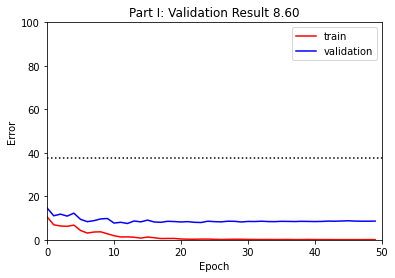

In [30]:
# Set seed so always get same result (do not change)
set_seed(1)

# choose cross entropy loss function (equation 5.24 in the loss notes)
loss_function = nn.CrossEntropyLoss()
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
# create 100 dummy data points and store in data loader class
x_train = torch.tensor(train_data_x.transpose().astype('float32'))
y_train = torch.tensor(train_data_y.astype('long'))
x_val= torch.tensor(val_data_x.transpose().astype('float32'))
y_val = torch.tensor(val_data_y.astype('long'))

# load the data into a class that creates the batches
data_loader = DataLoader(TensorDataset(x_train,y_train), batch_size=100, shuffle=True, worker_init_fn=np.random.seed(1))

# Initialize model weights
model.apply(weights_init)

# loop over the dataset n_epoch times
n_epoch = 50
# store the loss and the % correct at each epoch
losses_train = np.zeros((n_epoch))
errors_train = np.zeros((n_epoch))
losses_val = np.zeros((n_epoch))
errors_val = np.zeros((n_epoch))

for epoch in range(n_epoch):
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass -- calculate model output
    pred = model(x_batch[:,None,:])
    # compute the loss
    loss = loss_function(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()

  # Run whole dataset to get statistics -- normally wouldn't do this
  pred_train = model(x_train[:,None,:])
  pred_val = model(x_val[:,None,:])
  _, predicted_train_class = torch.max(pred_train.data, 1)
  _, predicted_val_class = torch.max(pred_val.data, 1)
  errors_train[epoch] = 100 - 100 * (predicted_train_class == y_train).float().sum() / len(y_train)
  errors_val[epoch]= 100 - 100 * (predicted_val_class == y_val).float().sum() / len(y_val)
  losses_train[epoch] = loss_function(pred_train, y_train).item()
  losses_val[epoch]= loss_function(pred_val, y_val).item()
  print(f'Epoch {epoch:5d}, train loss {losses_train[epoch]:.6f}, train error {errors_train[epoch]:3.2f},  val loss {losses_val[epoch]:.6f}, percent error {errors_val[epoch]:3.2f}')
  
  # tell scheduler to consider updating learning rate
  scheduler.step()

# Plot the results
fig, ax = plt.subplots()
ax.plot(errors_train,'r-',label='train')
ax.plot(errors_val,'b-',label='validation')
ax.set_ylim(0,100); ax.set_xlim(0,n_epoch)
ax.set_xlabel('Epoch'); ax.set_ylabel('Error')
ax.set_title('Part I: Validation Result %3.2f'%(errors_val[-1]))
ax.legend()
ax.plot([0,n_epoch],[37.45, 37.45],'k:') # Original results. You should be better than this!
plt.savefig('Coursework_I_Results.png',format='png')
plt.show()